In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  seaborn as sns
runs=pd.read_csv(r"Ball_by_Ball.csv")
print(runs.head())
print(runs.shape)


   Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   
1    335987           1        1        2                1                2   
2    335987           1        1        3                1                2   
3    335987           1        1        4                1                2   
4    335987           1        1        5                1                2   

   Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
0           1                         1               2         14   
1           2                         2               1         14   
2           2                         2               1         14   
3           2                         2               1         14   
4           2                         2               1         14   

  Batsman_Scored Extra_Type Extra_Runs Player_dissimal_Id Dissimal_Type  \
0              0    legbyes  

In [49]:

Players=pd.read_csv(r'player.csv')
Players=Players.drop(["Is_Umpire","Unnamed: 7"],axis=1)
Players.head()


,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,1,SC Ganguly,08-Jul-72,Left_Hand,Right-arm medium,India
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia
3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia
4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan


In [50]:
runs=runs[["Match_Id","Over_Id","Striker_Id","Bowler_Id","Batsman_Scored","Extra_Runs"]]
runs.head()

,Match_Id,Over_Id,Striker_Id,Bowler_Id,Batsman_Scored,Extra_Runs
0,335987,1,1,14,0,1
1,335987,1,2,14,0,
2,335987,1,2,14,0,1
3,335987,1,2,14,0,
4,335987,1,2,14,0,


In [51]:
runs.isnull().sum()

Match_Id          0
Over_Id           0
Striker_Id        0
Bowler_Id         0
Batsman_Scored    0
Extra_Runs        0
dtype: int64

In [52]:
runs["Extra_Runs"]=pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"]=runs["Extra_Runs"].fillna(0)
runs["Batsman_Scored"]=pd.to_numeric(runs["Batsman_Scored"],errors="coerce")
runs["Batsman_Scored"]=runs["Batsman_Scored"].fillna(0)
runs.head(14)

,Match_Id,Over_Id,Striker_Id,Bowler_Id,Batsman_Scored,Extra_Runs
0,335987,1,1,14,0.0,1.0
1,335987,1,2,14,0.0,0.0
2,335987,1,2,14,0.0,1.0
3,335987,1,2,14,0.0,0.0
4,335987,1,2,14,0.0,0.0
5,335987,1,2,14,0.0,0.0
6,335987,1,2,14,0.0,1.0
7,335987,2,2,15,0.0,0.0
8,335987,2,2,15,4.0,0.0
9,335987,2,2,15,4.0,0.0


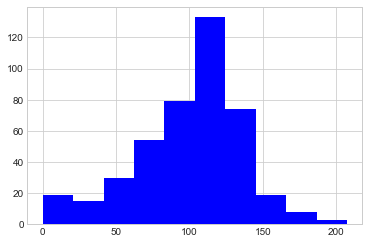

In [53]:
A=[]
B=[]

for i in runs["Striker_Id"].unique():
    a=runs["Batsman_Scored"][runs["Striker_Id"]==i].sum()
    b=runs["Match_Id"][runs["Striker_Id"]==i].count()
    A.append(a)
    B.append(b)
Batsmen=pd.DataFrame({"Players_names":runs["Striker_Id"].unique()})
Batsmen["Runs"]=A
Batsmen["Balls_played"]=B
Batsmen["Strike_Rate"]=(Batsmen["Runs"]*100/Batsmen["Balls_played"]).round(2)
Batsmen["Strike_Rate"].hist(color="blue")
plt.show()

In [54]:
Players.index[Players['Player_Id']].tolist()

IndexError: index 523 is out of bounds for axis 0 with size 523

In [56]:
Batsmen=Batsmen[Batsmen["Strike_Rate"]>60]
Batsmen=Batsmen[Batsmen["Strike_Rate"]<150]
Batsmen=Batsmen[(Batsmen["Runs"]*6/Batsmen["Balls_played"])>6]
#Batsmen.head()
print(Batsmen)


     Players_names    Runs  Balls_played  Strike_Rate
0                1  1349.0          1326       101.73
1                2  2435.0          1954       124.62
3                4  1322.0          1101       120.07
5                6  2170.0          1918       113.14
6                7   130.0           129       100.78
7                8  4105.0          3236       126.85
8                9  2427.0          2291       105.94
9               10   971.0           774       125.45
10              11   394.0           318       123.90
11              12    76.0            57       133.33
13              14   332.0           314       105.73
16              17  1927.0          1752       109.99
17              18  1107.0           839       131.94
18              19  1977.0          1648       119.96
19              20  3270.0          2419       135.18
20              21  4106.0          3059       134.23
22              23  1441.0          1245       115.74
24              25   417.0  

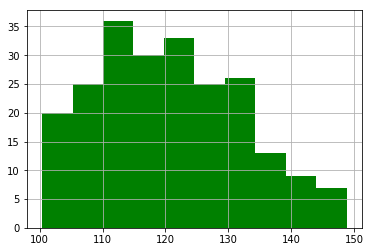

In [24]:
Batsmen["Strike_Rate"].hist(color="green")
plt.show()

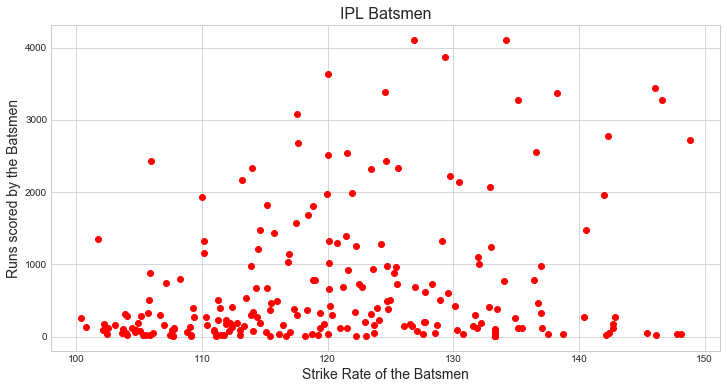

In [27]:
#import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Strike_Rate"], Batsmen["Runs"], color="red")
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()